$\mathbf{Q1})$       
Soit $m \in \mathbb{R}$, $n \in \mathbb{N}^{*}$, on considère $S_n = \sum_{i=}^{n} X_i$ avec $X_i$ des v.a i.i.d de loi $\mathcal{N}(-m,1)$
On souhaite montrer que le temps d'arrêt $N = min(n \in \mathbb{N}^{*}, S_n < a \cup S_n > b)$ est presque sûrement fini.      
Soit $n \in \mathbb{N}^*$ :
$$
\begin{align*}
    \mathbb{P} \left( N < n \right) &= \mathbb{P} \left( S_n < a \cup S_n > b \right) \\
    &= \mathbb{P} \left( S_n < a \right) + \mathbb{P} \left( S_n > b \right) \quad \text{ car } \{S_n < a\} \cap \{S_n > b\} = 0\\
    &= \mathbb{P} \left( S_n < a \right) + 1 - \mathbb{P} \left( S_n \leq b \right) \\
    &= 1 + \mathbb{P} \left( S_n < a \right) - \mathbb{P} \left( S_n \leq b \right) \\
\end{align*}
$$
A $n$ fixé, $S_n$ suit une loi normale car somme de loi normale indépendantes. On a donc $S_n \sim \mathcal{N}\left( -mn, n \right)$.      
Donc $Z_n = \frac{S_n + mn}{\sqrt{n}} \sim \mathcal{N} \left( 0,1 \right)$.      
Donc :
$$
\begin{align*}
    \mathbb{P} \left( N < n \right) &= 1 + \mathbb{P} \left( S_n < a \right) - \mathbb{P} \left( S_n \leq b \right) \\
    &= 1 + \mathbb{P} \left( Z_n < \frac{a + mn}{\sqrt{n}} \right) - \mathbb{P} \left( Z_n < \frac{b + mn}{\sqrt{n}} \right)  \\
    &= 1 + \phi( \frac{a + mn}{\sqrt{n}} ) - \phi( \frac{b + mn}{\sqrt{n}} ) \quad \text{avec } \phi \text{ la CDF d'une normale centrée réduite} \\
\end{align*}
$$
Soit $x \in \mathbb{R}$ :
$$
\begin{equation*}
    \frac{x + mn}{\sqrt{n}} \underset{+\infty}{\sim} \frac{mn}{\sqrt{n}} \underset{+ \infty}{\sim} m \sqrt{n} \underset{n \rightarrow + \infty}{ \longrightarrow} + \infty
\end{equation*}
$$
Donc par continuité à gauche de la CDF d'une loi normale centrée réduite : 
$$ 
\begin{equation*}
    \phi( \frac{x + mn}{\sqrt{n}} ) \underset{n \rightarrow + \infty}{ \longrightarrow} 1
\end{equation*}
$$
Donc finalement : 
$$
\begin{equation*}
    \mathbb{P} \left( N < + \infty \right) = \underset{n \rightarrow + \infty}{\lim}  \mathbb{P} \left( N <  n\right) = \underset{n \rightarrow + \infty}{\lim} \left( 1 + \phi( \frac{a + mn}{\sqrt{n}} ) - \phi( \frac{b + mn}{\sqrt{n}} ) \right) = 1 
\end{equation*}
$$
Donc $N$ est p.s fini

$\mathbf{Q2})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
m = 1
a = -50
b = 5

In [3]:
def traj_Sn():
    Sn = [np.random.normal(-m,1)]
    
    while( (Sn[-1] > a) & (Sn[-1] < b) ):
        Sn.append(Sn[-1] + np.random.normal(-m,1))
    n = np.arange(1,len(Sn)+1)
    return(n,Sn)

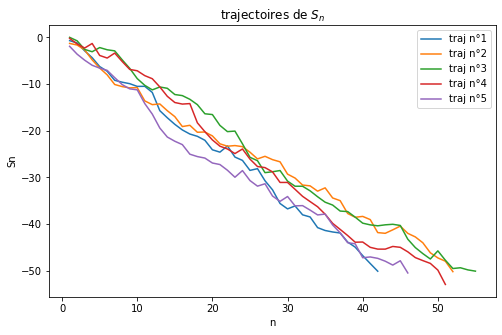

In [4]:
plt.subplots(figsize=(8,5))

for i in range(5):
    n,Sn = traj_Sn()
    plt.plot(n,Sn,label = "traj n°{}".format(i+1))
    
plt.xlabel("n")
plt.ylabel("Sn")
plt.title("trajectoires de $S_n$")
plt.legend()
plt.show()

$\mathbf{Q3}$     
$$
\begin{align*}
    p &= \mathbb{P} \left( S_N > b \right) \quad \text{par déf} \\
    &= \mathbb{E} \left[ 1_{ \{ S_N > b \} } \right] 
\end{align*}
$$
Donc un estimateur naturel de p est $\hat{p}_k$ défini tel que : 
$$
\begin{equation*}
    \hat{p}_k = \frac{1}{k} \sum_{i=1}^{k} \left( S_N^i > b  \right) \quad \text{avec } S_N^{i} \text{ une réalisation de } S_n
\end{equation*}
$$

In [5]:
def estime_p(k = 1000):
    val = 0
    for i in range(k):
        val += (traj_Sn()[1][-1] > b)
    return(val/k)

In [6]:
k = 1000
pk = estime_p(k)
print("pour k = {}, on trouve : pk = {}".format(k,pk))

pour k = 1000, on trouve : pk = 0.0


On voit que notre programme nous donne une proba nul. Or la vraie probabilité n'est pas nulle. Si notre programme nous donne ce résultat c'est parce que la vraie proba est très faible.         

Ce qui est intuitivement assez simple à comprendre car on considère une marche aléatoire qui à tendance à se diriger vers les négatifs (cf plot de trajectoire et espérance des $X_i$). De ce fait on a très peu de chances de sortir de l'intervalle $[a;b]$ par le haut. Donc un nombre de tirages si faibles nous donne une proba nulle.      

Cela se remarque très facilement en augmentant le nombres de tirages de $S_N$, on se retrouve avec une proba strictement positive.

In [27]:
k = 100000
pk = estime_p(k)
print("pour k = {}, on trouve : pk = {}".format(k,pk))

pour k = 100000, on trouve : pk = 2e-05


$\mathbf{Q4}$     
Soit $\psi$ une fonction mesurable positive. 
$$
\begin{align*}
    \mathbb{E} \left[ \psi( S_N ) \middle| N = n \right] &= \frac{ \mathbb{E} \left[ \psi( S_N ) 1_{\{ N = n \} }\right] }{\mathbb{P}(N=n) } \quad \text{formule de Bayes} \\
    &= \frac{1}{\mathbb{P}(N=n) } \int \psi(s) \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{s + mn}{\sqrt{n}})^2} \mathrm{d}s \quad \text{théorème de transfert} \\
    &= \frac{1}{\mathbb{P}(N=n) } \int \psi(s)  \frac{1}{\sqrt{2\pi}} \frac{ e^{-\frac{1}{2}(\frac{s + mn}{\sqrt{n}})^2}  }{  e^{-\frac{1}{2}(\frac{s - mn}{\sqrt{n}})^2} } e^{-\frac{1}{2}(\frac{s - mn}{\sqrt{n}})^2} \mathrm{d}s \\
    &= \frac{1}{\mathbb{P}(N=n) } \int \psi(s) \frac{1}{\sqrt{2\pi}} e^{-2ms} e^{-\frac{1}{2}(\frac{s - mn}{\sqrt{n}})^2} \mathrm{d}s \\
    &= \frac{ \mathbb{E} \left[ \psi( S_N^{'} ) e^{(-2m S_N^{'})} 1_{\{ N = n \} }\right] }{\mathbb{P}(N=n) } \quad \text{théorème de transfert} \\
    &= \mathbb{E} \left[ \psi( S_N^{'} ) e^{(-2m S_N^{'})} \middle| N = n \right] \quad \text{formule de Bayes} \\
\end{align*}
$$

$\mathbf{Q5}$       
Soit $f$ la densité de $S_N$ et $g$ la densité de $S_N^{'}$. 
$$
\begin{align*}
    p &= \mathbb{E} \left[ 1_{ \{ S_N > b \} } \right] \\
    &= \int 1_{ \{ s > b \} } f(s) \mathrm{d}s \quad \text{théorème de transfert} \\
    &=  \int 1_{ \{  s > b \} } \frac{f(s)}{g(s)} g(s) \mathrm{d}s \\
    &= \int 1_{ \{  s > b \} } exp\left( -2ms \right) g(s) \mathrm{d}s \quad \text{d'après Q4} \\
    &= \mathbb{E} \left[ 1_{ \{  S_n^{'} > b \} } exp\left( -2 m S_n^{'} \right) \right] \\
\end{align*}
$$
On peut donc prendre comme nouvel estimateur $\overline{p}_k$ : 
$$
\begin{equation*}
    \overline{p}_k = \frac{1}{k} \sum_{i=1}^k (S_N^{'i} > b ) exp \left( -2 m S_N^{'i} \right) 
\end{equation*}
$$

In [8]:
def new_traj_Sn():
    Sn = [np.random.normal(m,1)]
    
    while( (Sn[-1] > a) & (Sn[-1] < b) ):
        Sn.append(Sn[-1] + np.random.normal(m,1))
    n = np.arange(1,len(Sn)+1)
    return(n,Sn)

In [9]:
def new_estime_p(k = 1000):
    val = 0
    for i in range(k):
        Sn = new_traj_Sn()[1][-1]
        val += (Sn > b)*np.exp(-2*m*Sn)
    return(val/k)

In [12]:
val_k = [200*i for i in range(1,50,2)]
val_pk = []

for k in val_k:
    val_pk.append(new_estime_p(k))

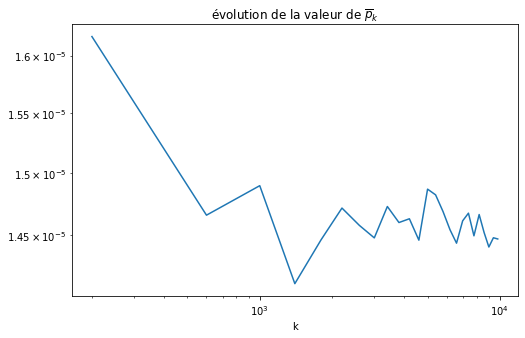

In [13]:
plt.subplots(figsize=(8,5))

plt.plot(val_k,val_pk)    
plt.xlabel("k")
plt.xscale('log')
plt.yscale('log')
plt.title("évolution de la valeur de $\overline{p}_k$")
plt.show()

$\mathbf{Q6}$ 

On remarque visuellement que la plus grande valeur que l'on obtient pour $\overline{p}_k$ est de l'ordre de $1,6*10^{-5}$ là où la "borne sup" $exp(-2*m*b)$ est quand à elle de l'ordre de $4*10^{-5}$. Cette majoration est donc bonne avec le MC par importance sampling.

In [24]:
val_pk_simple = []
for k in val_k:
    val_pk_simple.append(estime_p(k))

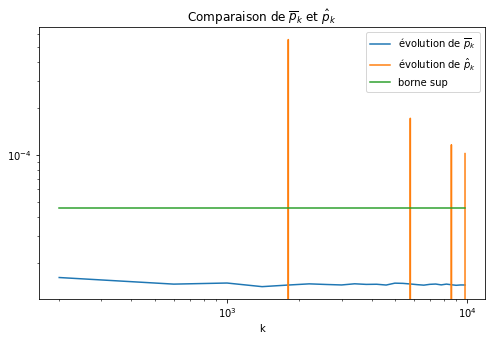

In [26]:
plt.subplots(figsize=(8,5))
plt.plot(val_k,val_pk, label = "évolution de $\overline{p}_k$")  
plt.plot(val_k,val_pk_simple, label = "évolution de $\hat{p}_k$")
plt.plot(val_k, np.exp(-2*m*b)*np.ones(len(val_k)), label = "borne sup")

plt.xlabel("k")
plt.xscale('log')
plt.yscale('log')
plt.title("Comparaison de $\overline{p}_k$ et $\hat{p}_k$")
plt.legend()
plt.show()

Toutefois si on regarde notre première méthode naïve, ce n'est pas bon. En effet on a soit 0 soit des valeurs beaucoup plus grande.      

C'est parce que "l'aléatoire n'est pas bien réparti" dans le sens où soit nos tirages sont tous trop éloignés et donc aucun ne réalise soit on en a beaucoup trop qui se réalisent et donc on a une proba bien supérieure à ce qu'on devrait avoir.     

C'est quelque chose qui est encore plus flagrant quand on remarque qu'en augmentant le nombre de tirages, ce phénomène tend à se réduire. 